# Filter Merged CDAW/LASCO CME Event & Non-event Catalogs
This notebook is for pulling out training datasets from the event and non-event merged CDAW/LASCO catalogs.

In [1]:
import requests
import pandas as pd

LASCO_Catalog_Filename = '../lasco_img_catalog_lvl_1.txt'
CME_Catalog_Filename = '../cme_event_catalog.txt'

#Merged_Catalog_Filename = '../cme_events.csv'
Merged_Catalog_Filename = '../merged_cdaw_lasco_catalog.csv'

C2_non_CME_Catalog_Filename = '../c2_non_events.csv'
C3_non_CME_Catalog_Filename = '../c3_non_events.csv'

# the number of files, sequentially, which we will difference
File_Seq_Size = 10

In [2]:
cme_data = pd.read_csv(Merged_Catalog_Filename)
#cme_data = cme_data.drop('Unnamed: 0', axis=1)
cme_data

/Users/bathomas/Code/cdaw_cme_catalog_analysis/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
0,0,25000294.fts,C2,1024,1024,Orang,Clear,1996-01-31 08:01:38,25.4,1996/01/31,...,47,158,5,25000292.fts,1024,1024,Orang,1996-01-31 05:42:43,25.1,Clear
1,1,25000295.fts,C2,1024,1024,Orang,Clear,1996-01-31 09:11:14,25.0,1996/01/31,...,47,158,5,25000292.fts,1024,1024,Orang,1996-01-31 05:42:43,25.1,Clear
2,2,25000296.fts,C2,1024,1024,Orang,Clear,1996-01-31 10:20:39,25.0,1996/01/31,...,47,158,5,25000292.fts,1024,1024,Orang,1996-01-31 05:42:43,25.1,Clear
3,3,25000297.fts,C2,1024,1024,Orang,Clear,1996-01-31 11:30:19,25.9,1996/01/31,...,47,158,5,25000292.fts,1024,1024,Orang,1996-01-31 05:42:43,25.1,Clear
4,4,25000298.fts,C2,1024,1024,Orang,Clear,1996-01-31 12:40:17,25.1,1996/01/31,...,47,158,5,25000292.fts,1024,1024,Orang,1996-01-31 05:42:43,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398826,398826,35513585.fts,C3,1024,1024,Clear,Clear,2017-08-31 23:04:45,17.6,2017/08/31,...,54,274,28858,35513550.fts,1024,1024,Clear,2017-08-31 16:17:54,17.6,Clear
398827,398827,35513586.fts,C3,1024,1024,Clear,Clear,2017-08-31 23:16:36,17.5,2017/08/31,...,54,274,28858,35513550.fts,1024,1024,Clear,2017-08-31 16:17:54,17.6,Clear
398828,398828,35513587.fts,C3,1024,1024,Clear,Clear,2017-08-31 23:28:54,17.9,2017/08/31,...,54,274,28858,35513550.fts,1024,1024,Clear,2017-08-31 16:17:54,17.6,Clear
398829,398829,35513588.fts,C3,1024,1024,Clear,Clear,2017-08-31 23:40:50,17.6,2017/08/31,...,54,274,28858,35513550.fts,1024,1024,Clear,2017-08-31 16:17:54,17.6,Clear


In [3]:
# function to get unique values 
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list
      

In [4]:
# test it out, try to pull a few intervals for events
C2_data = cme_data[cme_data['telescope']=='C2']
C2_data

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
0,0,25000294.fts,C2,1024,1024,Orang,Clear,1996-01-31 08:01:38,25.4,1996/01/31,...,47,158,5,25000292.fts,1024,1024,Orang,1996-01-31 05:42:43,25.1,Clear
1,1,25000295.fts,C2,1024,1024,Orang,Clear,1996-01-31 09:11:14,25.0,1996/01/31,...,47,158,5,25000292.fts,1024,1024,Orang,1996-01-31 05:42:43,25.1,Clear
2,2,25000296.fts,C2,1024,1024,Orang,Clear,1996-01-31 10:20:39,25.0,1996/01/31,...,47,158,5,25000292.fts,1024,1024,Orang,1996-01-31 05:42:43,25.1,Clear
3,3,25000297.fts,C2,1024,1024,Orang,Clear,1996-01-31 11:30:19,25.9,1996/01/31,...,47,158,5,25000292.fts,1024,1024,Orang,1996-01-31 05:42:43,25.1,Clear
4,4,25000298.fts,C2,1024,1024,Orang,Clear,1996-01-31 12:40:17,25.1,1996/01/31,...,47,158,5,25000292.fts,1024,1024,Orang,1996-01-31 05:42:43,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398792,398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398793,398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398794,398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear


In [5]:
# remove events which have poor data OR are different type ("Halo")
slice1 = C2_data
#for filter in ['Only 3 points', 'Only 2 points', 'Poor Event', 'data gap', 'Partial Halo', 'Halo', 'Not LE']:
for filter in ['Very Poor Event', 'Only 2 points', 'Only 3 points', 'data gap', 'Partial Halo', 'Halo', 'Not LE']:
    slice1 = slice1[~slice1['Remarks'].str.contains(filter, regex=True)]
slice1

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
25,25,25000487.fts,C2,1024,1024,Orang,Clear,1996-02-12 07:01:57,25.1,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
26,26,25000488.fts,C2,1024,1024,Orang,Clear,1996-02-12 08:16:27,25.0,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
27,27,25000489.fts,C2,1024,1024,Orang,Clear,1996-02-12 09:30:48,25.1,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
28,28,25000490.fts,C2,1024,1024,Orang,Clear,1996-02-12 10:45:46,25.1,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
29,29,25000491.fts,C2,1024,1024,Orang,Clear,1996-02-12 12:00:22,13.8,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398792,398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398793,398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398794,398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear


In [6]:
slice1.sort_values('Linear', ascending=True)[:1]

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
112356,112356,25364416.fts,C2,1024,1024,Orang,Clear,2011-03-08 19:06:50,25.1,2011/03/08,...,46,38,16091,25364291.fts,1024,1024,Orang,2011-03-07 18:55:46,25.1,Clear


In [7]:
slice1.sort_values('Linear', ascending=False)[:1]

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
68558,68558,25187907.fts,C2,1024,1024,Orang,Clear,2005-01-17 10:04:48,24.6,2005/01/17,...,360,2547,9474,25187906.fts,1024,1024,Orang,2005-01-17 09:52:44,25.1,Clear


In [8]:
ids = list(slice1['CDAW_Id'])
foo = unique(ids)
len(foo)

5305

In [9]:
#slice1['CDAW_Id'][:20]

In [10]:
#cme_event = slice1[slice1['CDAW_Id']==428]
#cme_event

In [11]:
#list(cme_event['filename']) #.to_string()

In [12]:
# how many files if we isolate 1024x1024 images
slice2 = slice1
slice2 = slice2[slice2['NumCols']==1024]
slice2 = slice2[slice2['NumRows']==1024]
slice2

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
25,25,25000487.fts,C2,1024,1024,Orang,Clear,1996-02-12 07:01:57,25.1,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
26,26,25000488.fts,C2,1024,1024,Orang,Clear,1996-02-12 08:16:27,25.0,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
27,27,25000489.fts,C2,1024,1024,Orang,Clear,1996-02-12 09:30:48,25.1,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
28,28,25000490.fts,C2,1024,1024,Orang,Clear,1996-02-12 10:45:46,25.1,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
29,29,25000491.fts,C2,1024,1024,Orang,Clear,1996-02-12 12:00:22,13.8,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398792,398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398793,398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398794,398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear


In [13]:
ids = list(slice2['CDAW_Id'])
len(unique(ids))

5289

In [14]:
filts = list(slice2['Filter'])
print(unique(filts))

['Orang']


In [15]:
#  Isolate events where we have 'campaign mode' (e.g. strange image sizes)
slice3 = slice1
slice3 = slice3[slice3['NumCols']!=1024]
slice3 = slice3[slice3['NumRows']!=1024]
campaign_ids = unique(list(slice3['CDAW_Id']))
print (len(campaign_ids))
#sorted(campaign_ids)

120


In [16]:
# cleaned list of general CMEs is now (campaign mode subtracted out)
cleaned = slice2[~slice2['CDAW_Id'].isin(campaign_ids)]
cleaned

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
25,25,25000487.fts,C2,1024,1024,Orang,Clear,1996-02-12 07:01:57,25.1,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
26,26,25000488.fts,C2,1024,1024,Orang,Clear,1996-02-12 08:16:27,25.0,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
27,27,25000489.fts,C2,1024,1024,Orang,Clear,1996-02-12 09:30:48,25.1,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
28,28,25000490.fts,C2,1024,1024,Orang,Clear,1996-02-12 10:45:46,25.1,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
29,29,25000491.fts,C2,1024,1024,Orang,Clear,1996-02-12 12:00:22,13.8,1996/02/12,...,53,160,8,25000485.fts,1024,1024,Orang,1996-02-12 04:32:50,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398792,398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398793,398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398794,398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear


In [17]:
ids = unique(list(cleaned['CDAW_Id']))
len(ids)

5172

In [18]:
# Remove events where they have only one file associated with it
result = cleaned.groupby('CDAW_Id', sort=False).count()
#result[result['CDAW_Id']=='8']
result['filename']


CDAW_Id
8         5
12        9
16        3
37        2
38        4
         ..
28844    33
28845    28
28851    28
28856    24
28858    20
Name: filename, Length: 5172, dtype: int64

Text(0, 0.5, 'Frequency')

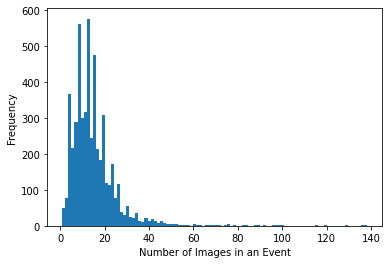

In [19]:
# plot number distribution of events
import matplotlib.pyplot as plt
result['filename'].plot.hist(bins=100)
plt.xlabel("Number of Images in an Event")
plt.ylabel("Frequency")
#plt.set(xlabel="foo")

Text(0, 0.5, 'Frequency')

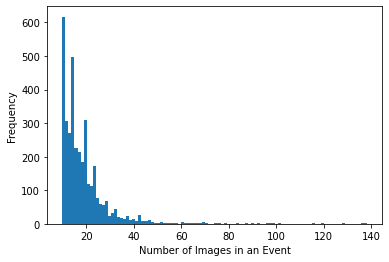

In [20]:
# find the number of events where we have File_Seq_Size or more files (images)
# we will train on first 5 differenced images
events_with_sufficent_images = result[result['filename']>=File_Seq_Size]
events_with_sufficent_images ['filename'].plot.hist(bins=100)
plt.xlabel("Number of Images in an Event")
plt.ylabel("Frequency")

#events_with_sufficent_images

In [21]:
#filter for the events with sufficent images now
esi_ids = list(events_with_sufficent_images.index)

cleaned2 = cleaned[cleaned['CDAW_Id'].isin(esi_ids)]
cleaned2

#esi_ids

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
2035,2035,25011722.fts,C2,1024,1024,Orang,Clear,1997-04-11 02:27:42,25.1,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2036,2036,25011723.fts,C2,1024,1024,Orang,Clear,1997-04-11 02:59:11,25.2,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2037,2037,25011724.fts,C2,1024,1024,Orang,Clear,1997-04-11 03:20:57,25.1,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2038,2038,25011725.fts,C2,1024,1024,Orang,Clear,1997-04-11 03:52:14,25.1,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2039,2039,25011726.fts,C2,1024,1024,Orang,Clear,1997-04-11 04:13:50,25.0,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398792,398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398793,398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398794,398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear


<AxesSubplot:ylabel='Frequency'>

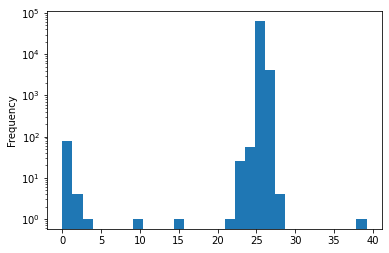

In [22]:
# examine exposure times
cleaned2['expTime'].plot.hist(logy=True, bins=30)

In [23]:
# get rid of exposure times which are not nominal (e.g. 25.1)
lower_exptime = 24.75
upper_exptime = 27.5

slice4 = cleaned2
slice4 = slice4[slice4['expTime']>= upper_exptime]

slice5 = cleaned2
slice5 = slice5[slice5['expTime']<= lower_exptime]

poor_exposure_ids = list(slice4['CDAW_Id'])
poor_exposure_ids.extend(list(slice5['CDAW_Id']))
poor_exposure_ids = unique (poor_exposure_ids)
len(poor_exposure_ids)

46

In [24]:
cleaned3 = cleaned2[~cleaned2['CDAW_Id'].isin(poor_exposure_ids)]
cleaned3

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
2035,2035,25011722.fts,C2,1024,1024,Orang,Clear,1997-04-11 02:27:42,25.1,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2036,2036,25011723.fts,C2,1024,1024,Orang,Clear,1997-04-11 02:59:11,25.2,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2037,2037,25011724.fts,C2,1024,1024,Orang,Clear,1997-04-11 03:20:57,25.1,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2038,2038,25011725.fts,C2,1024,1024,Orang,Clear,1997-04-11 03:52:14,25.1,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2039,2039,25011726.fts,C2,1024,1024,Orang,Clear,1997-04-11 04:13:50,25.0,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398792,398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398793,398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398794,398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear


In [25]:
# filter polarizer, Filter to be consistent
C2_Filter = 'Orang'
C2_Polarizer = 'Clear'
cleaned3 = cleaned3[cleaned3['Filter'].str.match(C2_Filter)]
cleaned3 = cleaned3[cleaned3['Polarizer'].str.match(C2_Polarizer)]
cleaned3 = cleaned3[cleaned3['bkgnd_Filter'].str.match(C2_Filter)]
cleaned3 = cleaned3[cleaned3['bkgnd_Polarizer'].str.match(C2_Polarizer)]
cleaned3

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
2035,2035,25011722.fts,C2,1024,1024,Orang,Clear,1997-04-11 02:27:42,25.1,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2036,2036,25011723.fts,C2,1024,1024,Orang,Clear,1997-04-11 02:59:11,25.2,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2037,2037,25011724.fts,C2,1024,1024,Orang,Clear,1997-04-11 03:20:57,25.1,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2038,2038,25011725.fts,C2,1024,1024,Orang,Clear,1997-04-11 03:52:14,25.1,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
2039,2039,25011726.fts,C2,1024,1024,Orang,Clear,1997-04-11 04:13:50,25.0,1997/04/11,...,41,155,276,25011721.fts,1024,1024,Orang,1997-04-11 02:06:01,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398792,398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398793,398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear
398794,398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,2017/08/31,...,54,274,28858,25649055.fts,1024,1024,Orang,2017-08-31 14:47:54,25.1,Clear


In [26]:
# now step through each CME event and keep only the first images
# as indicated by File_Seq_Size

cme_events = list(unique(cleaned3['CDAW_Id']))
filtered_data = {col:[] for col in cleaned3.columns}

for cme_event in cme_events:
    cme_data = cleaned3[cleaned3['CDAW_Id'] == cme_event]
    
    for row in cme_data[:File_Seq_Size].iterrows():
        for col in cleaned3.columns:
            filtered_data[col].append(row[1][col])
            
filtered_data = pd.DataFrame(filtered_data)
filtered_data

,Unnamed: 0,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,date-obs,...,Width,Linear,CDAW_Id,bkgnd_filename,bkgnd_NumCols,bkgnd_NumRows,bkgnd_Filter,bkgnd_datetime,bkgnd_expTime,bkgnd_Polarizer
0,279520,25526148.fts,C2,1024,1024,Orang,Clear,2014-11-18 03:11:18,25.1,2014/11/18,...,52,286,24578,25526144.fts,1024,1024,Orang,2014-11-18 02:47:15,25.1,Clear
1,279521,25526149.fts,C2,1024,1024,Orang,Clear,2014-11-18 03:23:15,25.2,2014/11/18,...,52,286,24578,25526144.fts,1024,1024,Orang,2014-11-18 02:47:15,25.1,Clear
2,279522,25526150.fts,C2,1024,1024,Orang,Clear,2014-11-18 03:35:15,25.1,2014/11/18,...,52,286,24578,25526144.fts,1024,1024,Orang,2014-11-18 02:47:15,25.1,Clear
3,279523,25526151.fts,C2,1024,1024,Orang,Clear,2014-11-18 03:47:15,25.0,2014/11/18,...,52,286,24578,25526144.fts,1024,1024,Orang,2014-11-18 02:47:15,25.1,Clear
4,279524,25526152.fts,C2,1024,1024,Orang,Clear,2014-11-18 03:59:16,25.2,2014/11/18,...,52,286,24578,25526144.fts,1024,1024,Orang,2014-11-18 02:47:15,25.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35655,113779,25369685.fts,C2,1024,1024,Orang,Clear,2011-04-23 19:35:06,25.1,2011/04/23,...,22,171,16382,25369679.fts,1024,1024,Orang,2011-04-23 18:23:04,25.1,Clear
35656,113780,25369686.fts,C2,1024,1024,Orang,Clear,2011-04-23 19:47:05,25.1,2011/04/23,...,22,171,16382,25369679.fts,1024,1024,Orang,2011-04-23 18:23:04,25.1,Clear
35657,113781,25369687.fts,C2,1024,1024,Orang,Clear,2011-04-23 19:59:06,25.1,2011/04/23,...,22,171,16382,25369679.fts,1024,1024,Orang,2011-04-23 18:23:04,25.1,Clear
35658,113782,25369688.fts,C2,1024,1024,Orang,Clear,2011-04-23 20:11:06,25.1,2011/04/23,...,22,171,16382,25369679.fts,1024,1024,Orang,2011-04-23 18:23:04,25.1,Clear


<AxesSubplot:ylabel='Frequency'>

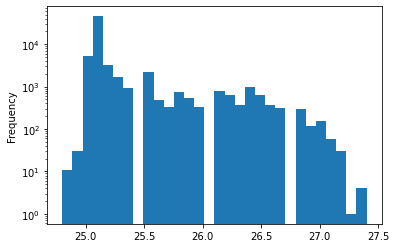

In [27]:
# examine exposure times
cleaned3['expTime'].plot.hist(logy=True, bins=30)

<AxesSubplot:ylabel='Frequency'>

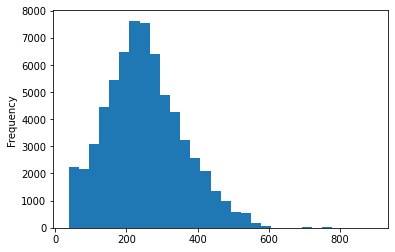

In [28]:
cleaned3['Linear'].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

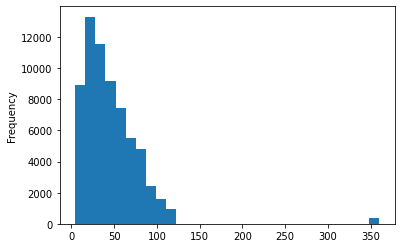

In [29]:
cleaned3['Width'].plot.hist(bins=30)

In [30]:
#write out list of dataset (postitive training)

training = filtered_data[['CDAW_Id','telescope', 'date-obs', 'datetime','filename']]
training.to_csv("../C2_positive_training_dataset.csv", index=None)
len(training)

35660

## Now build out a negative (non-CME) training dataset for both C2 and C3

In [31]:
# load non-event merged catalogs
c2_non_events = pd.read_csv(C2_non_CME_Catalog_Filename)
c3_non_events = pd.read_csv(C3_non_CME_Catalog_Filename)
c2_non_events

,filename,datetime,date-obs,NumCols,NumRows,Filter,Polarizer,expTime,telescope
0,25000300.fts,1996-01-31 18:48:55,1996/01/31,512,512,Orang,Clear,6.4,C2
1,25000301.fts,1996-02-01 00:43:07,1996/02/01,1024,1024,Orang,Clear,25.0,C2
2,25000302.fts,1996-02-01 01:07:04,1996/02/01,1024,1024,Orang,Clear,25.1,C2
3,25000303.fts,1996-02-01 02:21:56,1996/02/01,1024,1024,Orang,Clear,25.4,C2
4,25000304.fts,1996-02-01 03:36:53,1996/02/01,1024,1024,Orang,Clear,25.1,C2
...,...,...,...,...,...,...,...,...,...
470093,25649100.fts,2017-08-31 22:34:39,2017/08/31,1024,1024,Orang,Clear,25.1,C2
470094,25649101.fts,2017-08-31 23:10:42,2017/08/31,1024,1024,Orang,Clear,25.1,C2
470095,25649102.fts,2017-08-31 23:22:37,2017/08/31,1024,1024,Orang,Clear,25.5,C2
470096,25649103.fts,2017-08-31 23:34:50,2017/08/31,1024,1024,Orang,Clear,25.1,C2


In [32]:
filts = list(c2_non_events['Filter'])
print(unique(filts))

['Blue', 'DeepR', 'Orang']


In [33]:
# apply the same filter/constraints as for CME event data 
def filter_data(data:pd.DataFrame, filtername:str, polarizer:str)->pd.DataFrame:

    slice1 = data
    
    # only 1024x1024
    slice1 = slice1[slice1['NumRows']==1024]
    slice1 = slice1[slice1['NumCols']==1024]
    
    # only right exptimes
    slice1 = slice1[slice1['expTime'] <= upper_exptime]
    slice1 = slice1[slice1['expTime'] >= lower_exptime]
    
    slice1 = slice1[slice1['Filter'].str.match(filtername)]
    slice1 = slice1 [slice1['Polarizer'].str.match(polarizer)]
    
    # TODO?: filter by time window (start year, stop year)
    # where we drew CME events from (to better match non-CME
    # activity of sun in same period)
    
    return slice1

c2_ne = filter_data(c2_non_events, C2_Filter, C2_Polarizer)
c2_ne

,filename,datetime,date-obs,NumCols,NumRows,Filter,Polarizer,expTime,telescope
1,25000301.fts,1996-02-01 00:43:07,1996/02/01,1024,1024,Orang,Clear,25.0,C2
2,25000302.fts,1996-02-01 01:07:04,1996/02/01,1024,1024,Orang,Clear,25.1,C2
3,25000303.fts,1996-02-01 02:21:56,1996/02/01,1024,1024,Orang,Clear,25.4,C2
4,25000304.fts,1996-02-01 03:36:53,1996/02/01,1024,1024,Orang,Clear,25.1,C2
5,25000305.fts,1996-02-01 04:51:44,1996/02/01,1024,1024,Orang,Clear,25.1,C2
...,...,...,...,...,...,...,...,...,...
470093,25649100.fts,2017-08-31 22:34:39,2017/08/31,1024,1024,Orang,Clear,25.1,C2
470094,25649101.fts,2017-08-31 23:10:42,2017/08/31,1024,1024,Orang,Clear,25.1,C2
470095,25649102.fts,2017-08-31 23:22:37,2017/08/31,1024,1024,Orang,Clear,25.5,C2
470096,25649103.fts,2017-08-31 23:34:50,2017/08/31,1024,1024,Orang,Clear,25.1,C2


<AxesSubplot:ylabel='Frequency'>

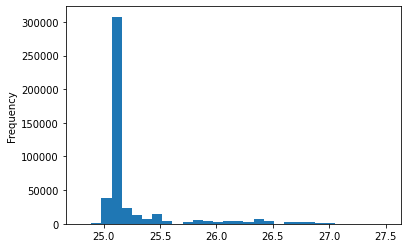

In [34]:
c2_ne['expTime'].plot.hist(bins=30)

In [35]:
import random

def random_sample(non_cme_data, cme_data:pd.DataFrame, size:int=File_Seq_Size)->pd.DataFrame:
    
    # randomly sample out X dates which have size (File_Seq_Size) or more observations
    # X = number of CME events for which we have size or more observations
    num_cme_events = len(unique(list(cme_data['CDAW_Id'])))

    date_list = unique(list(non_cme_data['date-obs']))
    
    print(num_cme_events, len(date_list))

    random_data = { col:[] for col in non_cme_data.columns }

    found_obs = 0
    # use random sample to pick random dates to get non event data from. We
    # multiply cme event number by small factor to allow for possible short intervals we cannot use
    for date in random.sample(date_list, int(num_cme_events * 1.1)): 
        if found_obs >= num_cme_events:
            # end when we match number of cme events
            print('matched number of cme events')
            break

        # pull data for this date
        date_data = non_cme_data[non_cme_data['date-obs'] == date]

        # check if its got File_Seq_Size or more files available
        if len(date_data) >= size:
            # it has sufficent, so cache it
            for row in date_data[:size].iterrows():
                for col in non_cme_data.columns:
                    random_data[col].append(row[1][col])

            found_obs += 1
            
    return pd.DataFrame(random_data)

c2_non_event_random_data = random_sample(non_cme_data=c2_ne, cme_data=cleaned3, size=File_Seq_Size)

c2_non_event_random_data

3566 7503
matched number of cme events


,filename,datetime,date-obs,NumCols,NumRows,Filter,Polarizer,expTime,telescope
0,25183129.fts,2004-11-08 01:30:31,2004/11/08,1024,1024,Orang,Clear,25.1,C2
1,25183130.fts,2004-11-08 01:52:44,2004/11/08,1024,1024,Orang,Clear,25.1,C2
2,25183131.fts,2004-11-08 02:04:44,2004/11/08,1024,1024,Orang,Clear,25.1,C2
3,25183132.fts,2004-11-08 02:28:52,2004/11/08,1024,1024,Orang,Clear,25.0,C2
4,25183133.fts,2004-11-08 02:52:29,2004/11/08,1024,1024,Orang,Clear,25.1,C2
...,...,...,...,...,...,...,...,...,...
35655,25025584.fts,1997-12-05 02:54:59,1997/12/05,1024,1024,Orang,Clear,25.1,C2
35656,25025585.fts,1997-12-05 03:07:51,1997/12/05,1024,1024,Orang,Clear,25.3,C2
35657,25025586.fts,1997-12-05 03:26:50,1997/12/05,1024,1024,Orang,Clear,25.1,C2
35658,25025587.fts,1997-12-05 03:54:58,1997/12/05,1024,1024,Orang,Clear,25.1,C2


In [36]:
#c2_non_event_random_data['telescope'] = ['C2' for t in range(0, len(c2_non_event_random_data))]

# include date-obs in this dataset so we can use it downstream as a type of non event 'id'
final_c2_non_event = c2_non_event_random_data[['datetime', 'date-obs', 'telescope', 'filename']]
final_c2_non_event.to_csv("../C2_negative_training_dataset.csv", index=None)

In [37]:
final_c2_non_event

,datetime,date-obs,telescope,filename
0,2004-11-08 01:30:31,2004/11/08,C2,25183129.fts
1,2004-11-08 01:52:44,2004/11/08,C2,25183130.fts
2,2004-11-08 02:04:44,2004/11/08,C2,25183131.fts
3,2004-11-08 02:28:52,2004/11/08,C2,25183132.fts
4,2004-11-08 02:52:29,2004/11/08,C2,25183133.fts
...,...,...,...,...
35655,1997-12-05 02:54:59,1997/12/05,C2,25025584.fts
35656,1997-12-05 03:07:51,1997/12/05,C2,25025585.fts
35657,1997-12-05 03:26:50,1997/12/05,C2,25025586.fts
35658,1997-12-05 03:54:58,1997/12/05,C2,25025587.fts


In [38]:
filts = list(c3_non_events['Filter'])
print(unique(filts))
print(unique(list(c3_non_events['Polarizer'])))

['Clear']
['Clear']


In [41]:
# Pull out C3 data, TBD

C3_Filter = 'Orang'
C3_Polarizer = 'Clear'

c3_ne = filter_data(c3_non_events, C3_Filter, C3_Polarizer)

c3_non_event_random_data = random_sample(non_cme_data=c3_ne, cme_data=cleaned3, size=File_Seq_Size)
c3_non_event_random_data['telescope'] = ['C3' for t in range(0, len(c3_non_event_random_data))]

final_c3_non_event = c3_non_event_random_data[['datetime', 'date-obs', 'telescope', 'filename']]
final_c3_non_event.to_csv("../C3_negative_training_dataset.csv", index=None)

3566 5


ValueError: Sample larger than population or is negative